# Uma preve Analise dos dados apresentados

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df = pd.read_csv('dados_geral.csv')
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticket,Date,Adj Close,Data,Hora
0,2022-12-02 10:00:00-03:00,9.85,9.98,9.56,9.95,8916800,0.0,0.0,AMER3,NaN,NaN,2022-12-02,10:00:00
1,2022-12-02 11:00:00-03:00,9.94,10.20,9.93,10.19,6936500,0.0,0.0,AMER3,NaN,NaN,2022-12-02,11:00:00
2,2022-12-02 12:00:00-03:00,10.18,10.23,9.90,9.93,5058400,0.0,0.0,AMER3,NaN,NaN,2022-12-02,12:00:00
3,2022-12-02 13:00:00-03:00,9.93,9.93,9.77,9.82,4395600,0.0,0.0,AMER3,NaN,NaN,2022-12-02,13:00:00
4,2022-12-02 14:00:00-03:00,9.82,9.90,9.70,9.76,2781200,0.0,0.0,AMER3,NaN,NaN,2022-12-02,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,2022-08-30 13:00:00-03:00,4.54,4.54,4.46,4.51,14719300,0.0,0.0,MGLU3,NaN,NaN,2022-08-30,13:00:00
3805,2022-08-30 14:00:00-03:00,4.52,4.52,4.34,4.42,36060200,0.0,0.0,MGLU3,NaN,NaN,2022-08-30,14:00:00
3806,2022-08-30 15:00:00-03:00,4.42,4.48,4.41,4.47,15686300,0.0,0.0,MGLU3,NaN,NaN,2022-08-30,15:00:00
3807,2022-08-30 16:00:00-03:00,4.48,4.56,4.45,4.49,24927400,0.0,0.0,MGLU3,NaN,NaN,2022-08-30,16:00:00


## Tratamento

In [42]:
df

,Open,High,Low,Close,Ticket,Data,Hora
0,9.85,9.98,9.56,9.95,AMER3,2022-12-02,10:00:00
1,9.94,10.20,9.93,10.19,AMER3,2022-12-02,11:00:00
2,10.18,10.23,9.90,9.93,AMER3,2022-12-02,12:00:00
3,9.93,9.93,9.77,9.82,AMER3,2022-12-02,13:00:00
4,9.82,9.90,9.70,9.76,AMER3,2022-12-02,14:00:00
...,...,...,...,...,...,...,...
3804,4.54,4.54,4.46,4.51,MGLU3,2022-08-30,13:00:00
3805,4.52,4.52,4.34,4.42,MGLU3,2022-08-30,14:00:00
3806,4.42,4.48,4.41,4.47,MGLU3,2022-08-30,15:00:00
3807,4.48,4.56,4.45,4.49,MGLU3,2022-08-30,16:00:00


In [39]:
df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Ticket            object
Data      datetime64[ns]
Hora              object
dtype: object

In [37]:

##DROP de colunas desnecessarias 

df.drop(['Datetime', 'Dividends','Stock Splits','Volume','Date','Adj Close'], axis=1, inplace = True)

In [38]:
# convertendo a coluna Data em tipo data
df['Data'] = pd.to_datetime(df['Data'])

In [40]:
import pandas as pd

def weighted_average(df, values, weights):
    """
    Calcula a média ponderada de uma coluna do DataFrame.
    """
    return (df[values] * df[weights]).sum() / df[weights].sum()

# Agrupar os dados por dia e por ticket e calcular a média ponderada
df_media = df.groupby(['Ticket', 'Data']).apply(
    lambda x: pd.Series({
        'Open': weighted_average(x, 'Open', 'Close'),
        'High': weighted_average(x, 'High', 'Close'),
        'Low': weighted_average(x, 'Low', 'Close'),
        'Close': x['Close'].mean()
    })
).reset_index()

# Exibir o resultado
print(df_media)



    Ticket       Data       Open       High        Low      Close
0    AMER3 2022-08-01  13.909062  14.028687  13.766618  13.900000
1    AMER3 2022-08-03  14.259007  14.489762  14.184653  14.363750
2    AMER3 2022-08-04  15.177910  15.397637  15.033731  15.191250
3    AMER3 2022-08-05  14.267656  14.356113  13.946843  14.123750
4    AMER3 2022-08-08  14.361459  14.523842  14.167853  14.375000
..     ...        ...        ...        ...        ...        ...
510  MGLU3 2023-01-27   4.415202   4.479441   4.388184   4.445714
511  MGLU3 2023-01-30   4.547223   4.585966   4.487340   4.532857
512  MGLU3 2023-01-31   4.372843   4.424444   4.340108   4.381429
513  MGLU3 2023-02-01   4.291758   4.314608   4.224608   4.265714
514  MGLU3 2023-02-02   4.412792   4.481844   4.365622   4.431429

[515 rows x 6 columns]


In [43]:
df_media

,Ticket,Data,Open,High,Low,Close
0,AMER3,2022-08-01,13.909062,14.028687,13.766618,13.900000
1,AMER3,2022-08-03,14.259007,14.489762,14.184653,14.363750
2,AMER3,2022-08-04,15.177910,15.397637,15.033731,15.191250
3,AMER3,2022-08-05,14.267656,14.356113,13.946843,14.123750
4,AMER3,2022-08-08,14.361459,14.523842,14.167853,14.375000
...,...,...,...,...,...,...
510,MGLU3,2023-01-27,4.415202,4.479441,4.388184,4.445714
511,MGLU3,2023-01-30,4.547223,4.585966,4.487340,4.532857
512,MGLU3,2023-01-31,4.372843,4.424444,4.340108,4.381429
513,MGLU3,2023-02-01,4.291758,4.314608,4.224608,4.265714


In [44]:
df['Ticket'].unique()

array(['AMER3', 'ASAI3', 'CRFB3', 'MGLU3'], dtype=object)

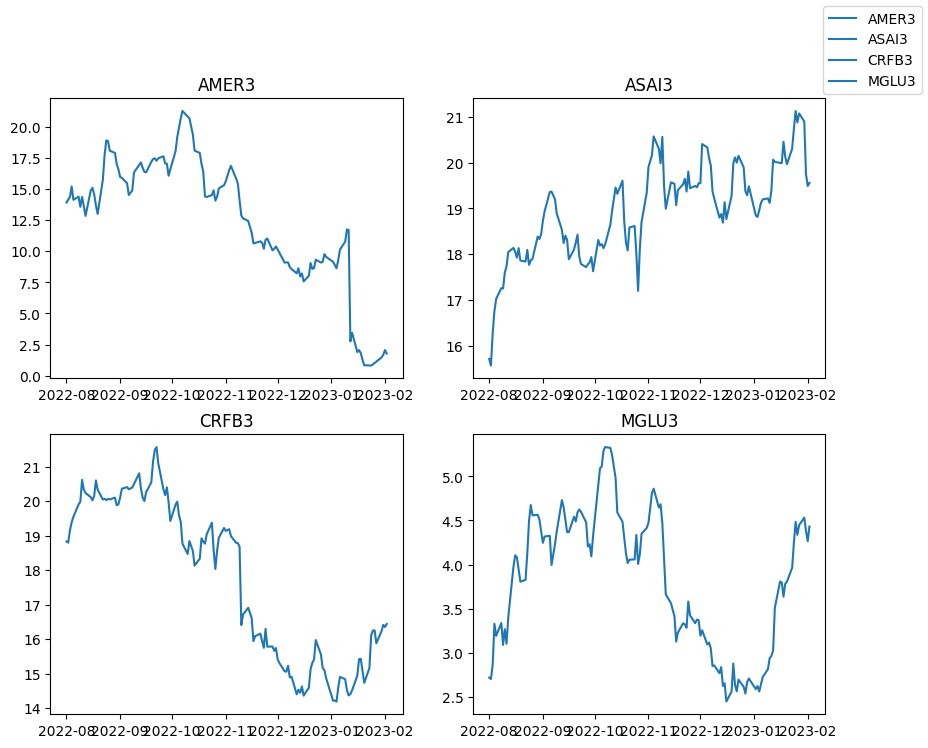

In [46]:
# Agrupar os dados por 'Ticket'
grupos = df_media.groupby('Ticket')

# Definir o número de plots e as janelas de plotagem
n_plots = 4  # número de plots que deseja gerar
fig, janela = plt.subplots(2, 2, figsize=(10, 8))

# Gerar um gráfico para cada grupo de dados
for i, (ticket, grupo) in enumerate(grupos):
    # Calcular a linha média
    linha_media = grupo.groupby('Data')['Close'].mean()
    
    # Determinar o índice da linha e da coluna para o plot atual
    j = i % 2
    k = i // 2
    
    # Verificar se o índice está dentro dos limites da matriz 'janela'
    if k < janela.shape[0] and j < janela.shape[1]:
        # Gerar o plot
        janela[k, j].plot(linha_media.index, linha_media.values)
        janela[k, j].set_title(ticket)
    
# Adicionar a legenda
fig.legend(grupos.groups.keys())

# Mostrar o plot
plt.show()

In [55]:
# Criar lista de cores
cores = ['blue', 'red', 'green', 'orange']

# Gerar um gráfico para cada grupo de dados
for i, (ticket, grupo) in enumerate(grupos):
    # Calcular a linha média
    linha_media = grupo.groupby('Data')['Close'].mean()
    
    # Determinar o índice da linha e da coluna para o plot atual
    j = i % 2
    k = i // 2
    
    # Verificar se o índice está dentro dos limites da matriz 'janela'
    if k < janela.shape[0] and j < janela.shape[1]:
        # Gerar o plot com a cor correspondente
        janela[k, j].plot(linha_media.index, linha_media.values, color=cores[i])
        janela[k, j].set_title(ticket)
    
# Adicionar a legenda
fig.legend(grupos.groups.keys())

# Mostrar o plot
plt.show()

